In [1]:
# import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:\Data Science\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df[df.Churn=='Yes'].shape[0]/df[df.Churn=='No'].shape[0] 

0.36122922303826827

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
#TotalCharges is not present above, Let's see dtype of TotalCharges column
np.dtype(df.TotalCharges)

dtype('O')

In [12]:
#Let's convert it to a numeric type
df.TotalCharges=pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [13]:
#By looking at the above error, we can understand the reason behind the dtype('o')

len(df[df.TotalCharges==' ']) #We have 11 records with Total Charges value -> ' ' and all these rows have Churn value 'NO', let's remove these rows from our analysis (Having information on Churned customers is more important than info on unchurned records)  
df=df[df.TotalCharges!=' ']

df.TotalCharges=pd.to_numeric(df.TotalCharges)
np.dtype(df.TotalCharges)

dtype('float64')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [21]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')
df.SeniorCitizen.value_counts()

SeniorCitizen
No    7032
Name: count, dtype: int64

In [22]:
cat_cols_for_wrangling=['MultipleLines','DeviceProtection','OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','InternetService']nts()


SyntaxError: invalid syntax (1087628548.py, line 1)

In [23]:
#Some Data Wrangling.. We will Convert values like 'No Phone Service', 'No Internet Service' to 'No'. In other words, we're creating binary columns (Yes or No)

for col in cat_cols_for_wrangling:
    df[col]=df[col].apply(lambda x: 'No' if 'No' in x else 'Yes')

NameError: name 'cat_cols_for_wrangling' is not defined

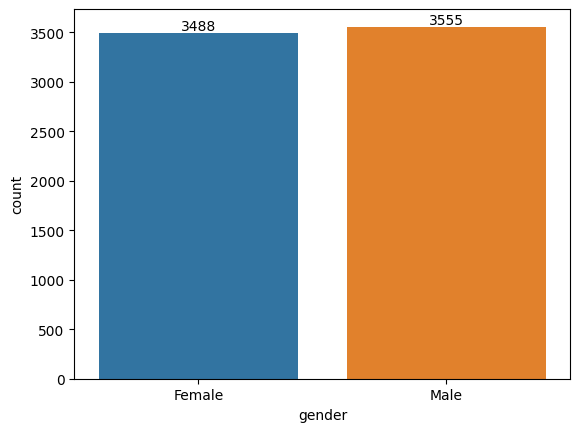

In [38]:
gn = sns.countplot(x = 'gender',data = df)

for bars in gn.containers:
    gn.bar_label(bars)


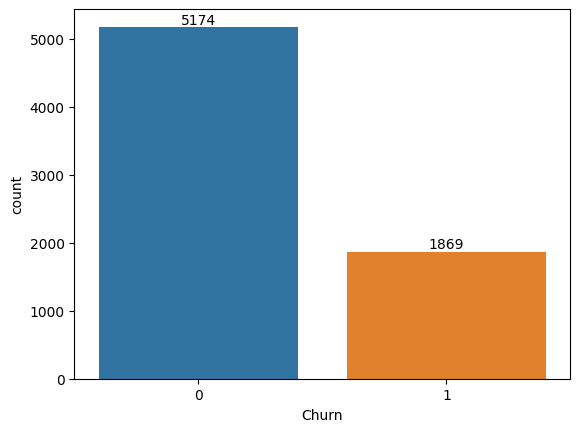

In [39]:
ch = sns.countplot(x = 'Churn',data = df)

for bars in ch.containers:
    ch.bar_label(bars)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


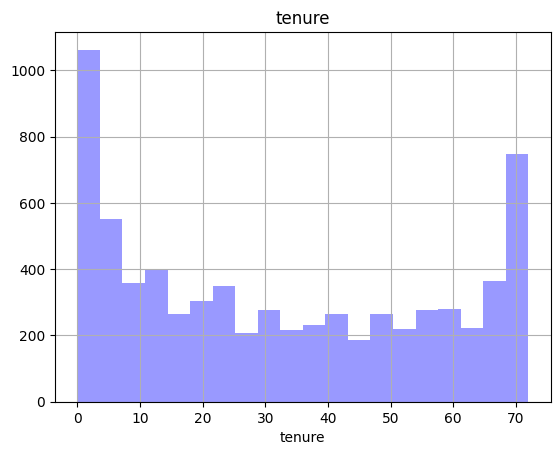

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


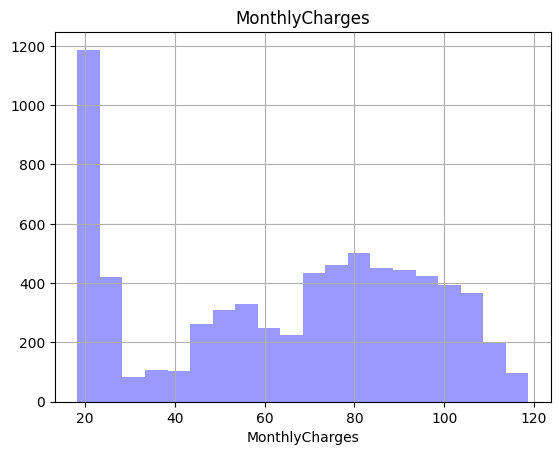

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


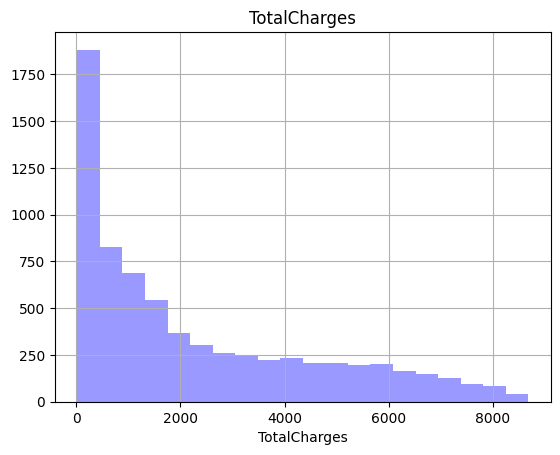

In [40]:

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20, alpha=0.4, color='b')
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        
for col in num_cols:
    num_summary(df, col, plot=True)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
        .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
        .format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(rf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
        .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
        .format(svm.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

In [ ]:
# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('Accuracy of AdaBoost classifier on training set: {:.2f}'
        .format(ada.score(X_train, y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'
        .format(ada.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Feature Importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [23]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Random Forest
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)
print(CV_rf.best_score_)
y_pred_rf = CV_rf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(CV_rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(CV_rf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
    

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
0.8045526391812141
Accuracy of Random Forest classifier on training set: 0.84
Accuracy of Random Forest classifier on test set: 0.80


NameError: name 'confusion_matrix' is not defined

In [ ]:
# XGBoost
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [4,5,6,7,8],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2]
}
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_score_)
y_pred_xgb = CV_xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(CV_xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(CV_xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Feature Importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(CV_rf.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# compare the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost'],
    'Score': [logreg.score(X_test, y_test), CV_rf.score(X_test, y_test), svm.score(X_test, y_test), ada.score(X_test, y_test), CV_xgb.score(X_test, y_test)],
    'Train Score': [logreg.score(X_train, y_train), CV_rf.score(X_train, y_train), svm.score(X_train, y_train), ada.score(X_train, y_train), CV_xgb.score(X_train, y_train)]
    , 'Best Params': ['-', CV_rf.best_params_, '-', '-', CV_xgb.best_params_]
    , 'Best Score': ['-', CV_rf.best_score_, '-', '-', CV_xgb.best_score_]
    , 'Confusion Matrix': [confusion_matrix(y_test, y_pred_log), confusion_matrix(y_test, y_pred_rf), confusion_matrix(y_test, y_pred_svm), confusion_matrix(y_test, y_pred_ada), confusion_matrix(y_test, y_pred_xgb)]})
models.sort_values(by='Score', ascending=False)